In [1]:
import matplotlib.pyplot as plt

# torch
import torch
import torch.nn.functional as F

# custom imports
from ddpm import Diffusion
from model import Classifier, UNet
from dataset.helpers import *
from util import show, set_seed, CLASS_LABELS
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
set_seed()

# Load model
diffusion = Diffusion(img_size=16, T=500, beta_start=1e-4, beta_end=0.02, diff_type='DDPM-cg', device=device)

classifier = Classifier(
    img_size=16, c_in=3, labels=5,
    time_dim=256,channels=32, device=device
)
classifier.to(device)
classifier.eval()
classifier.load_state_dict(torch.load('weights/classifier/model.pth', map_location=device))

unet = UNet(device=device)
unet.eval()
unet.to(device)
unet.load_state_dict(torch.load('weights/DDPM/model.pth', map_location=device))
diffusion.classifier = classifier 

# Sample
y = torch.tensor([0,1,2,3,4], device=device)
time_steps = [200,100,50]
x_new, intermediates = diffusion.p_sample_loop(unet, 5, timesteps_to_save=time_steps,y=y,classifier_scale=1)
#imgs = [im_normalize(tens2image(x_gen.cpu())) for x_gen in x_new]
#show(imgs, fig_titles=CLASS_LABELS, title='Classifier Guidance t=0', save_path='assets/cg_samples_0.png')

time_steps = time_steps+[0]


03:41:23 - INFO: Sampling 5 new images....


Diffusion type: DDPM-cg


100%|██████████| 499/499 [00:27<00:00, 18.19it/s]


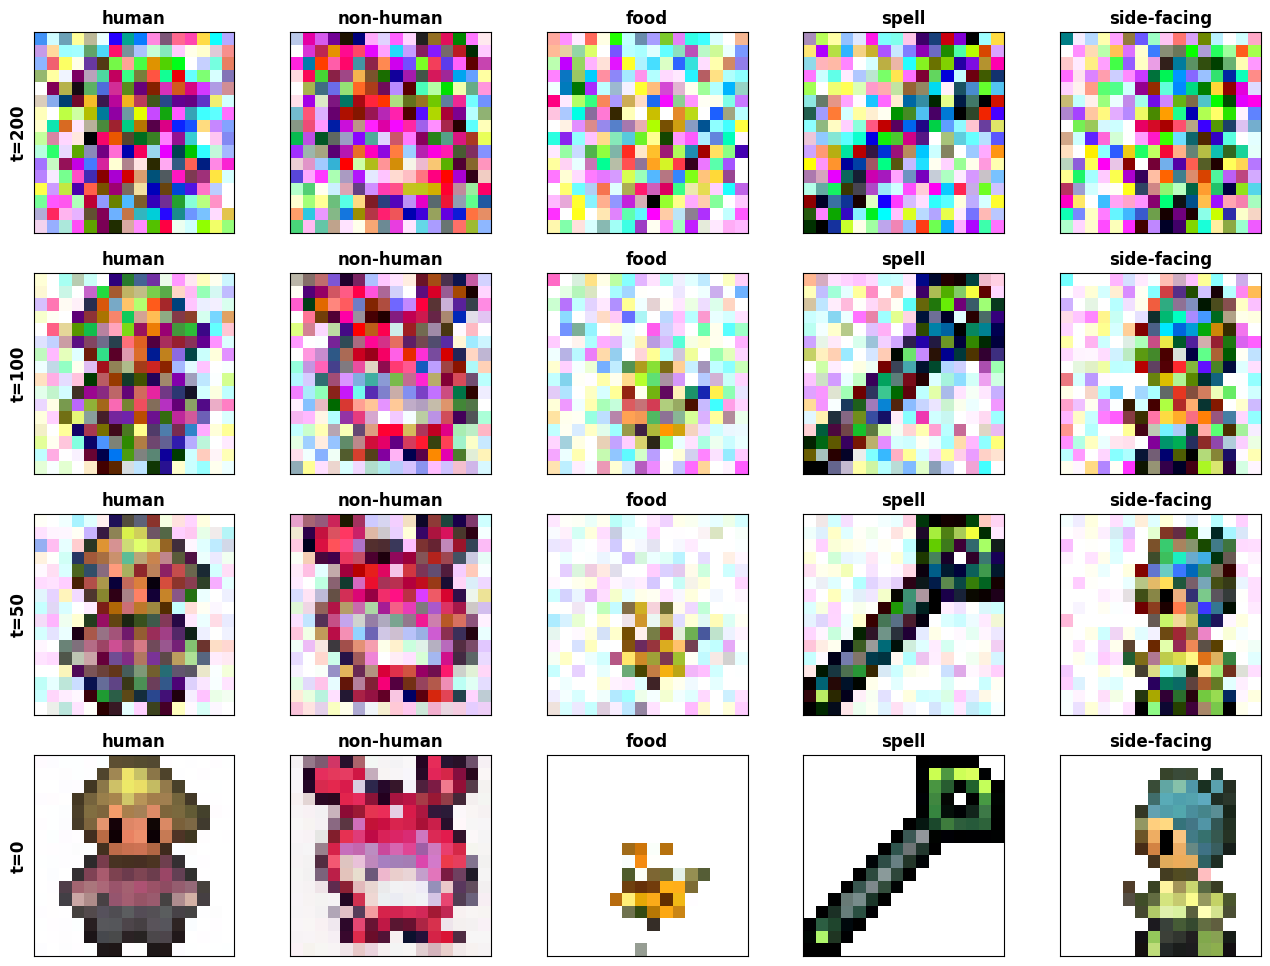

In [2]:

fig_titles = CLASS_LABELS

fig, axs = plt.subplots(len(time_steps), ncols=y.shape[0], figsize=(16, 3*len(time_steps)))

rows = [f"t={t_}" for t_ in time_steps]

#for ax, row in zip(axs[0],rows):
#    ax.set_ylabel(row,rotation=90,size="large")
for j, interm in enumerate(intermediates):
    imgs = [im_normalize(tens2image(x_gen.cpu())) for x_gen in interm]
    
    for i, img in enumerate(imgs):
        if(i==0):
            axs[j,i].set_ylabel(rows[j],rotation=90,size="large",fontweight="bold")
        axs[j,i].imshow(img)
        #axs[j,i].axis('off')
        axs[j,i].xaxis.set_ticks([])
        axs[j,i].yaxis.set_ticks([])
        axs[j,i].set_title(fig_titles[i],fontweight="bold")

plt.savefig("sample_cg_timesteps.png", bbox_inches='tight', pad_inches=0)

plt.show()



Retry

03:41:52 - INFO: Sampling 5 new images....
100%|██████████| 499/499 [00:33<00:00, 14.72it/s]


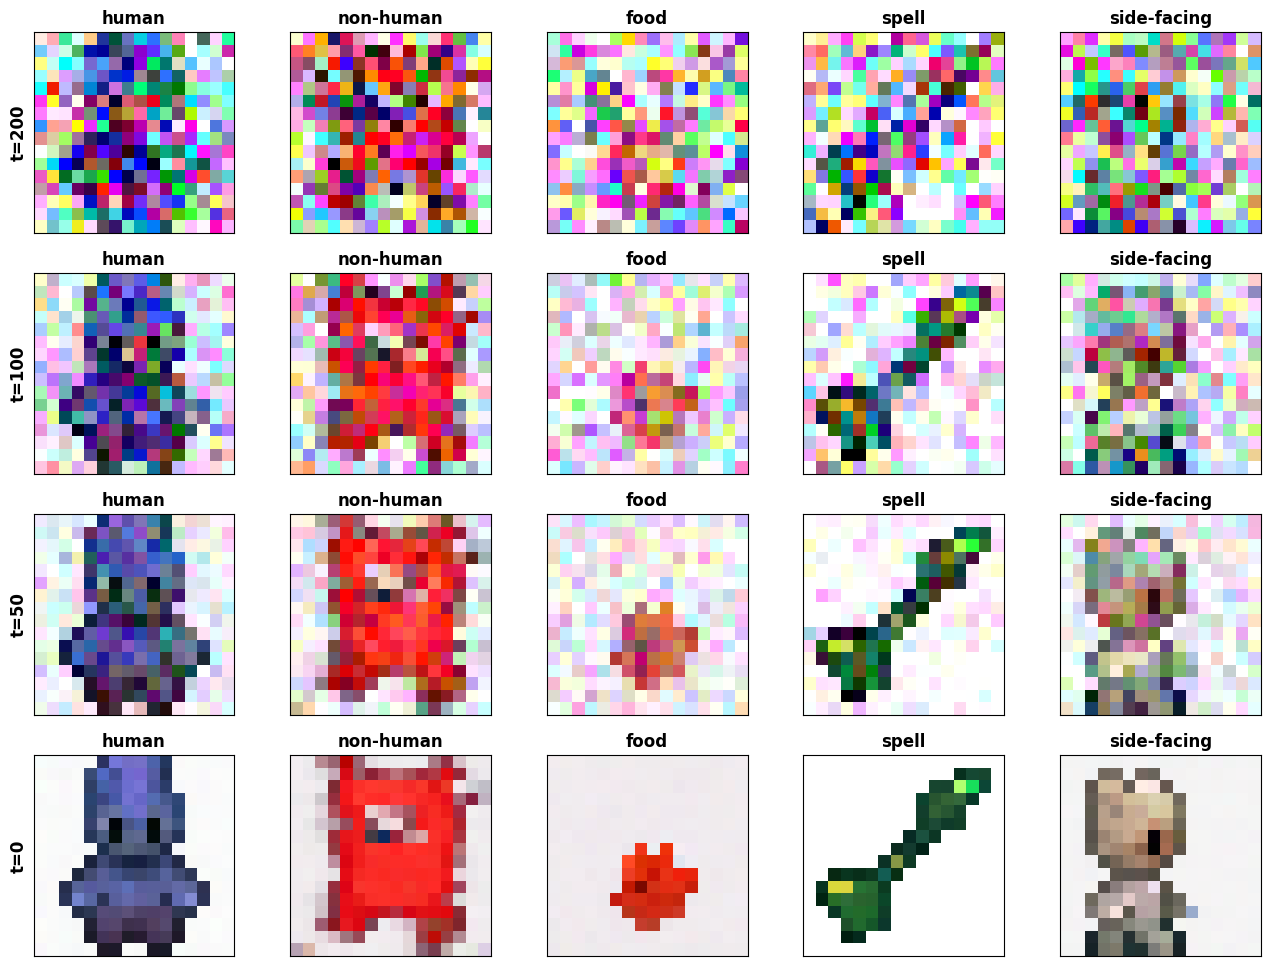

In [3]:
y = torch.tensor([0,1,2,3,4], device=device)
time_steps = [200,100,50]
x_new, intermediates = diffusion.p_sample_loop(unet, 5, timesteps_to_save=time_steps,y=y,classifier_scale=1)
#imgs = [im_normalize(tens2image(x_gen.cpu())) for x_gen in x_new]
#show(imgs, fig_titles=CLASS_LABELS, title='Classifier Guidance t=0', save_path='assets/cg_samples_0.png')

time_steps = time_steps+[0]
fig_titles = CLASS_LABELS

fig, axs = plt.subplots(len(time_steps), ncols=y.shape[0], figsize=(16, 3*len(time_steps)))

rows = [f"t={t_}" for t_ in time_steps]

#for ax, row in zip(axs[0],rows):
#    ax.set_ylabel(row,rotation=90,size="large")
for j, interm in enumerate(intermediates):
    imgs = [im_normalize(tens2image(x_gen.cpu())) for x_gen in interm]
    
    for i, img in enumerate(imgs):
        if(i==0):
            axs[j,i].set_ylabel(rows[j],rotation=90,size="large",fontweight="bold")
        axs[j,i].imshow(img)
        #axs[j,i].axis('off')
        axs[j,i].xaxis.set_ticks([])
        axs[j,i].yaxis.set_ticks([])
        axs[j,i].set_title(fig_titles[i],fontweight="bold")

plt.savefig("sample_cg_timesteps.png", bbox_inches='tight', pad_inches=0)

plt.show()

In [21]:
def sample_and_plot(num_samples=5,CLASS_LABELS = None, diffusionModel = None,scale = 1,device=None):
    y = torch.arange(0,5).repeat(num_samples).to(device)
    x_new = diffusionModel.p_sample_loop(unet, 5*num_samples, y=y,classifier_scale=scale)
    for i in range(num_samples):
        CLASS_LABELS += CLASS_LABELS

    fig_titles = CLASS_LABELS
    imgs = [im_normalize(tens2image(x_gen.cpu())) for x_gen in x_new]
    fig, axs = plt.subplots(num_samples, ncols=5, figsize=(16, num_samples*3))

    row = 0
    col = 0
    for i, img in enumerate(imgs):
        if(i%5==0 and i>0):
            row += 1 
            col = 0
        axs[row,col].imshow(img)
        #axs[j,i].axis('off')
        axs[row,col].xaxis.set_ticks([])
        axs[row,col].yaxis.set_ticks([])
        axs[row,col].set_title(fig_titles[i],fontweight="bold")
        col += 1

    plt.savefig(f"sample_cg_{num_samples}_rounds.png", bbox_inches='tight', pad_inches=0)
    plt.show()
    return



03:58:24 - INFO: Sampling 25 new images....
100%|██████████| 499/499 [01:15<00:00,  6.57it/s]


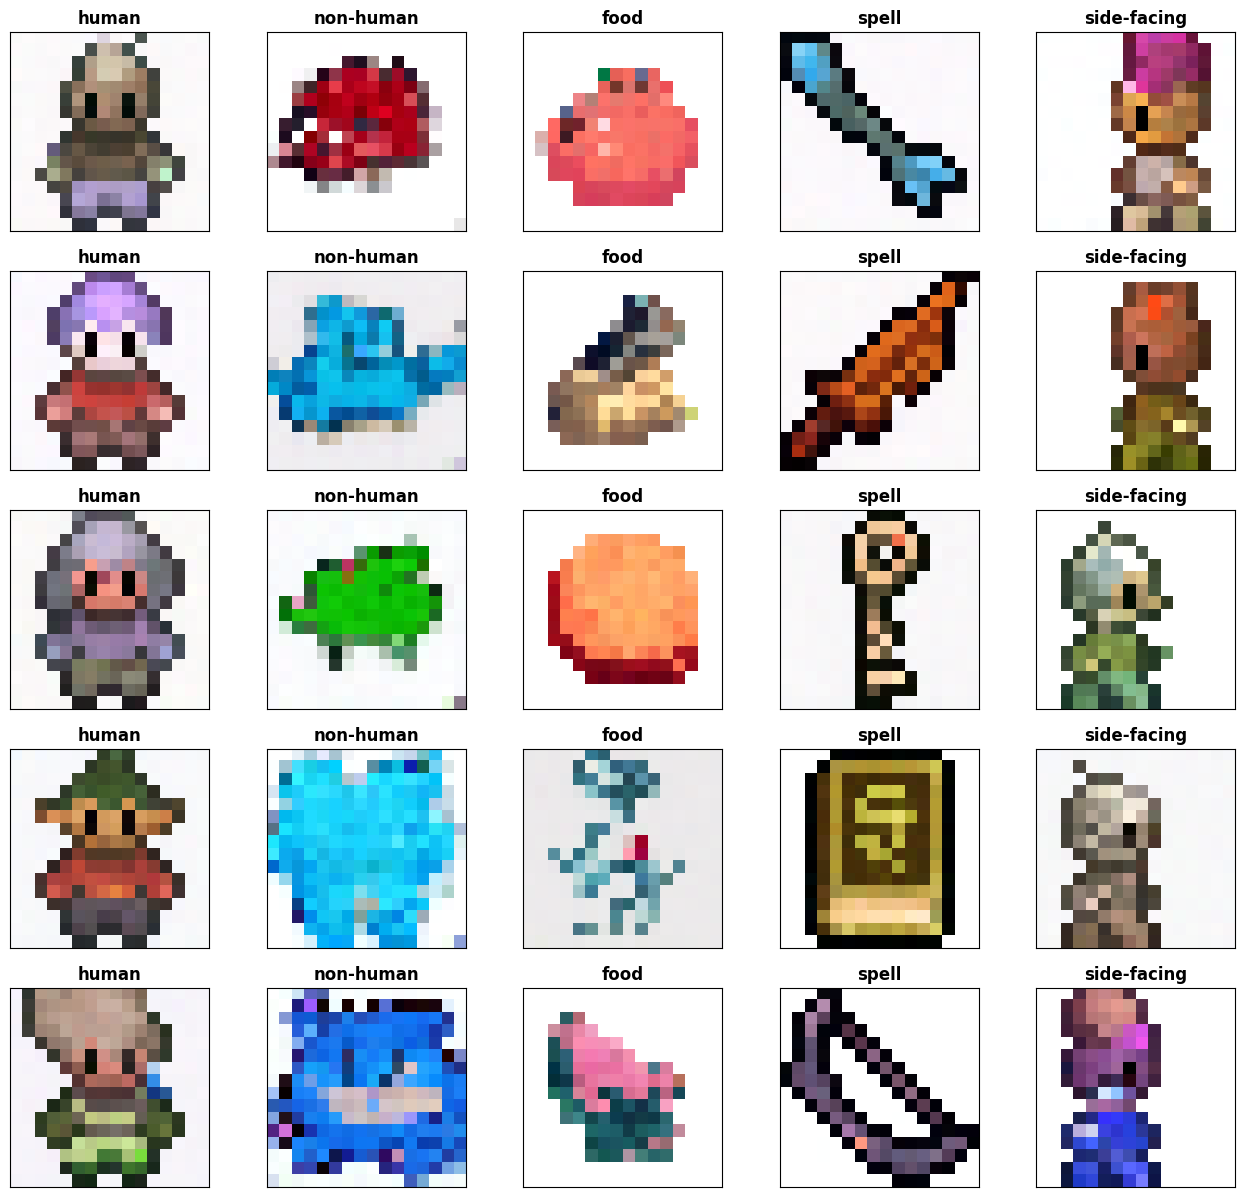

In [20]:
sample_and_plot(5,CLASS_LABELS,diffusion,device=device)

04:07:02 - INFO: Sampling 25 new images....
100%|██████████| 499/499 [01:09<00:00,  7.13it/s]


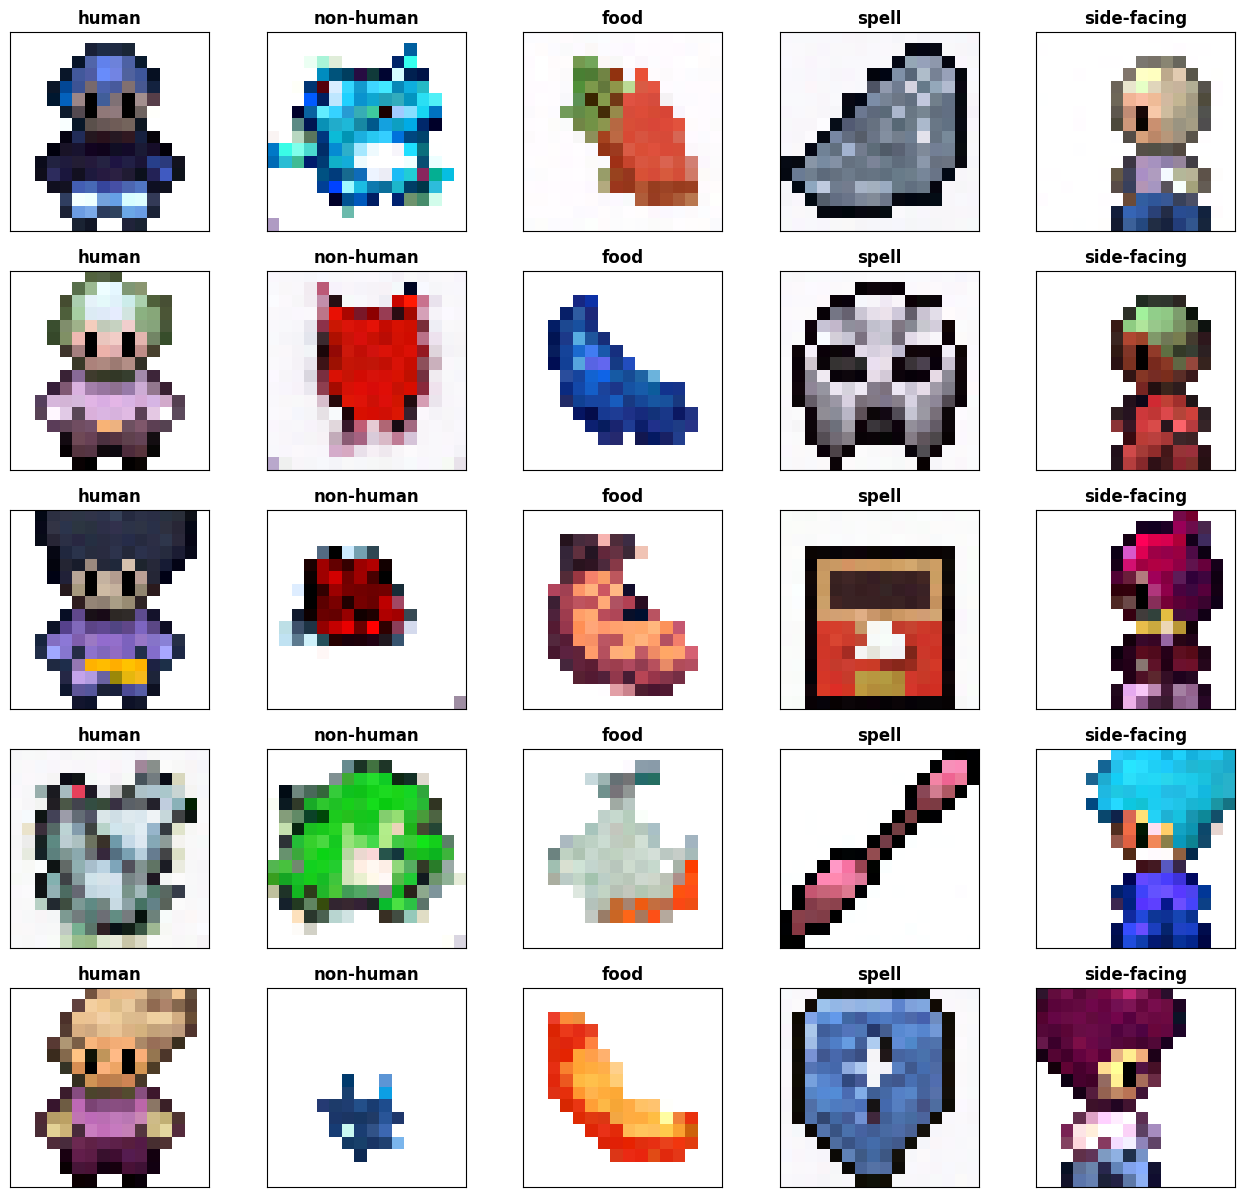

In [22]:
sample_and_plot(5,CLASS_LABELS,diffusion,scale=10,device=device)


04:08:14 - INFO: Sampling 25 new images....
100%|██████████| 499/499 [01:09<00:00,  7.16it/s]


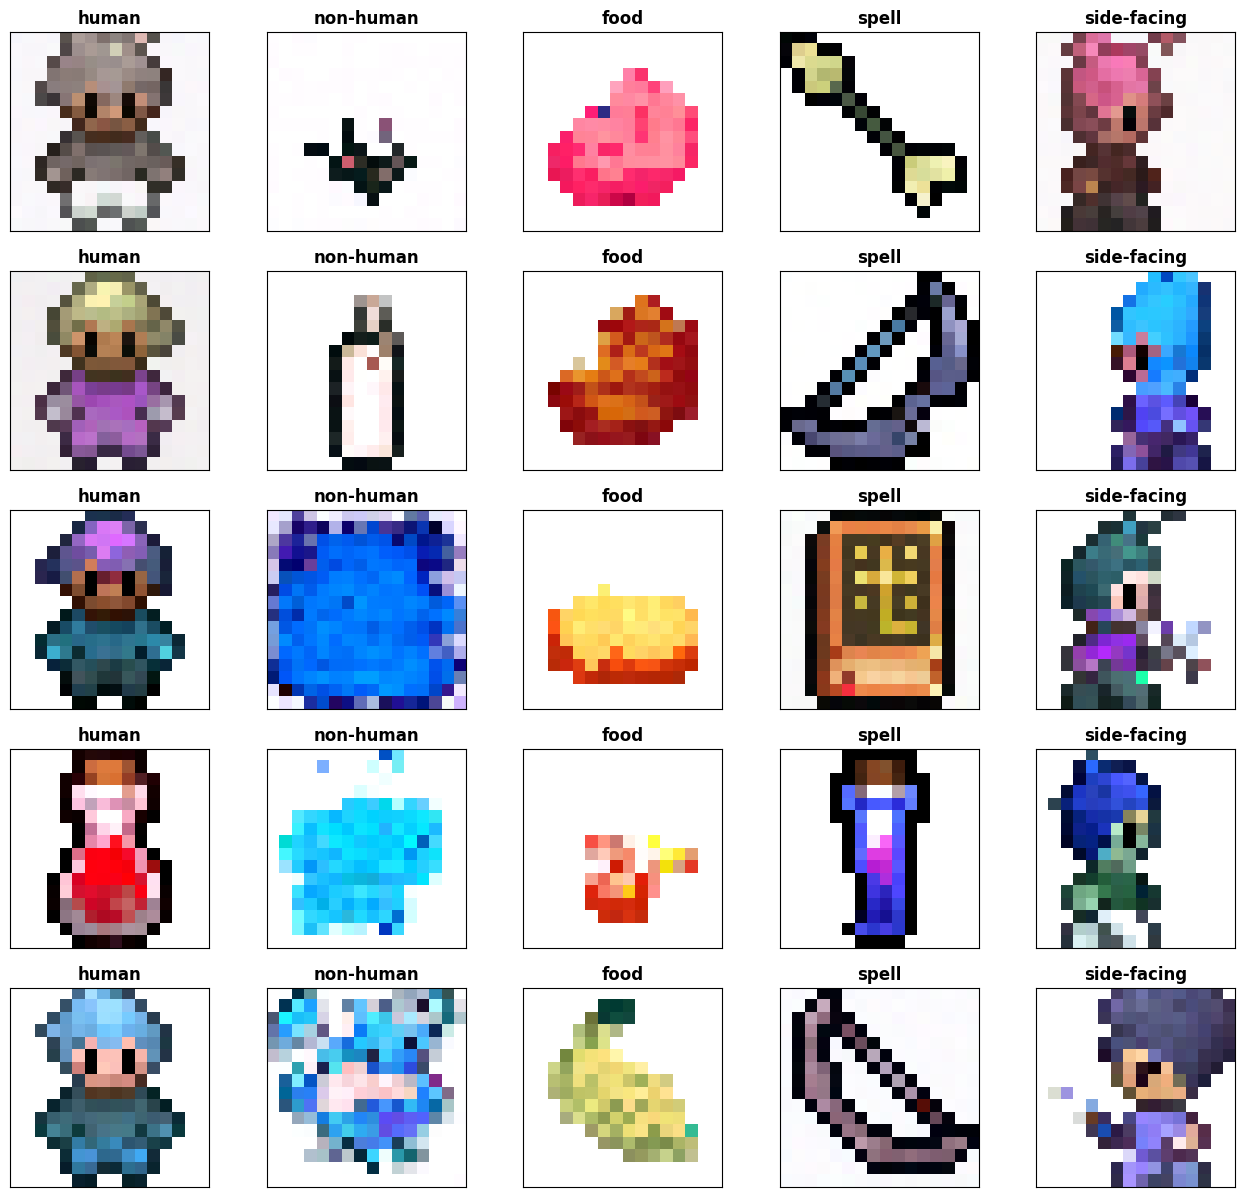

In [23]:
sample_and_plot(5,CLASS_LABELS,diffusion,scale=0.1,device=device)
